# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [4]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

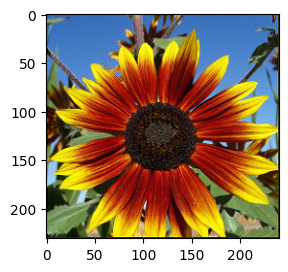

In [6]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

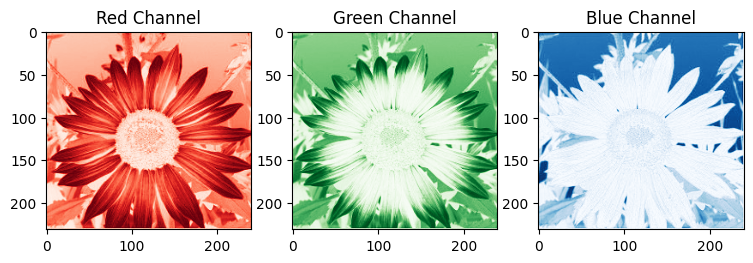

In [7]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

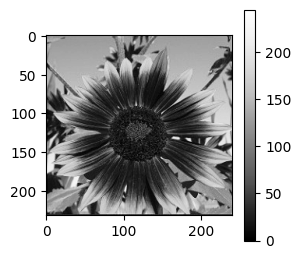

In [9]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**

Да, можно посчитать, но как правило тривиальное преобразование не эффективно, поскольку возможна потеря информации в некоторых пикселях. Это возможно потому что каждый цвет в отдельности представляет собой яркость то есть градацию от черного к белому.

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**

Это инвинтированноее представление в котором происходит оторбражение от черного к белому, то есть полностью черный имеет значение 0, а белый 255. В Greys ноборот.

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [10]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

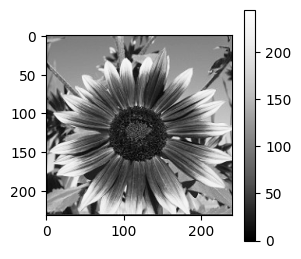

In [11]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [12]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [18]:
def convert_rgb_to_grayscale(img_rgb):
    return np.round(0.29901 * img_rgb[:,:,0] + 0.58701 * img_rgb[:,:,1] + 0.1140 * img_rgb[:,:,2])

In [19]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

In [20]:
convert_rgb_to_grayscale(img_rgb)

array([[117., 112., 117., ..., 117., 124.,  79.],
       [121.,  93.,  91., ..., 111., 118.,  58.],
       [131.,  94., 100., ..., 115., 126.,  59.],
       ...,
       [128.,  10.,  35., ..., 130., 150.,  56.],
       [136.,   7.,  17., ..., 151., 163.,  74.],
       [ 88.,  36.,  53., ...,  38.,  50.,  25.]])

In [21]:
cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

array([[117, 112, 117, ..., 117, 124,  79],
       [121,  93,  91, ..., 111, 118,  58],
       [131,  94, 100, ..., 115, 126,  59],
       ...,
       [128,  10,  35, ..., 130, 150,  56],
       [136,   7,  17, ..., 151, 163,  74],
       [ 88,  36,  53, ...,  38,  50,  25]], dtype=uint8)

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [22]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

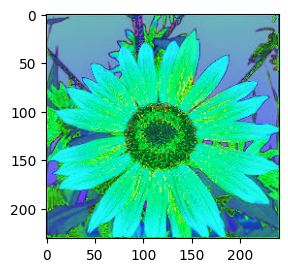

In [23]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

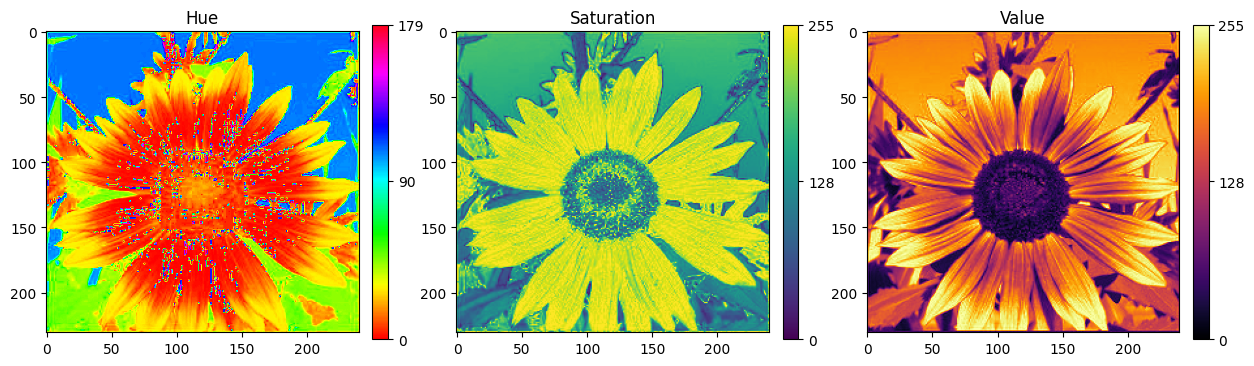

In [24]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

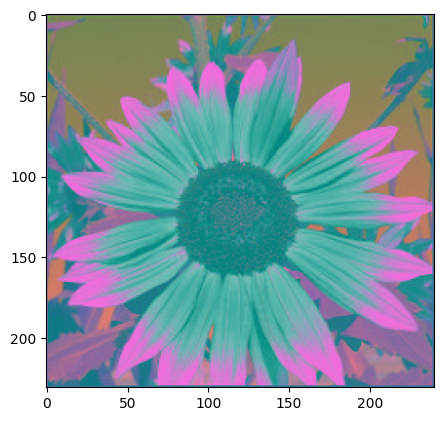

In [27]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
plt.figure(figsize=[5, 5])
plt.imshow(img_lab)

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** При печати используют CMYK, а не RGB.

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [28]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [29]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [30]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

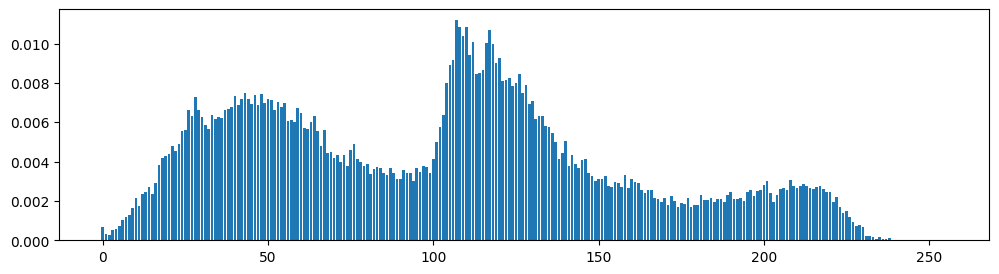

In [31]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [32]:
def compute_hist(img):
    if np.max(np.max(img))>256:
        hist = np.full((np.max(np.max(img))+1), 0)
    else:
        hist = np.full((256), 0)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i,j]]+=1
    return hist

In [33]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

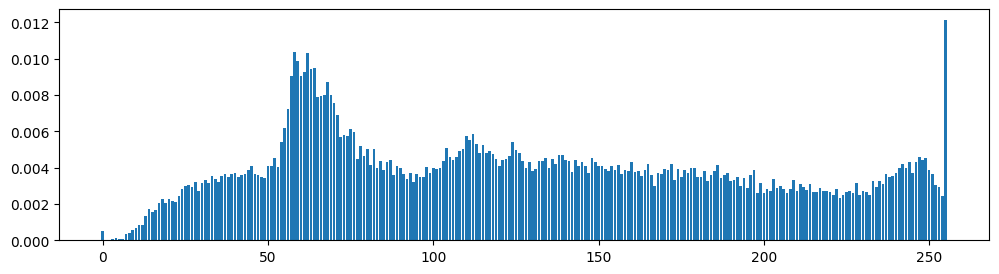

In [34]:
visualize_hist(hist_r)

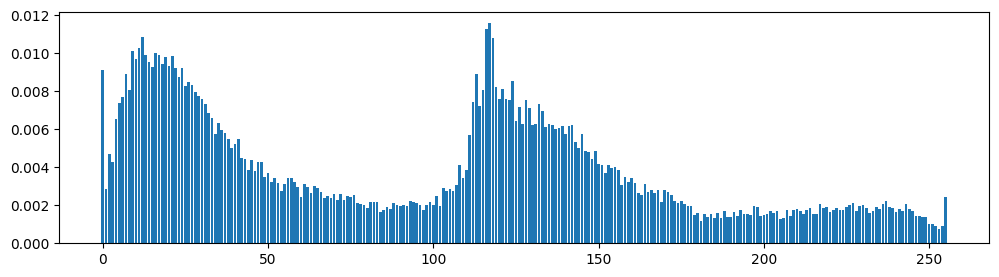

In [35]:
visualize_hist(hist_g)

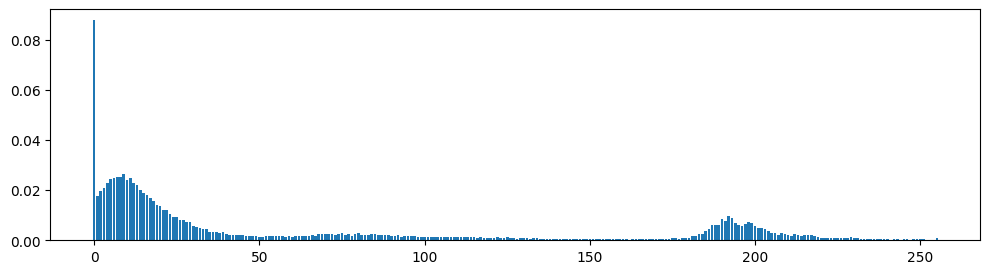

In [36]:
visualize_hist(hist_b)

In [37]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:** Мы можем сказать об яркости изображение а также о распределнии цветов.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:** При смене положение камеры или в принципе сцены будет происходить резкое изменение. В статических кадрах изменения будут минимальны.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

In [38]:
cv2.imwrite('img_gray90.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 90])
cv2.imwrite('img_gray60.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 60])
cv2.imwrite('img_gray30.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 30])
cv2.imwrite('img_gray5.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 5])

True

Степень сжатия 90

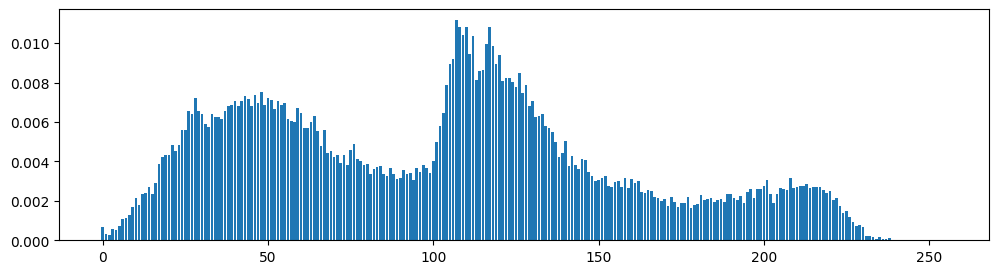

In [42]:
img_gray90 = cv2.imread('img_gray90.jpg')
hist_gray90 = compute_hist(img_gray90)
visualize_hist(hist_gray90)

Степень сжатия 60

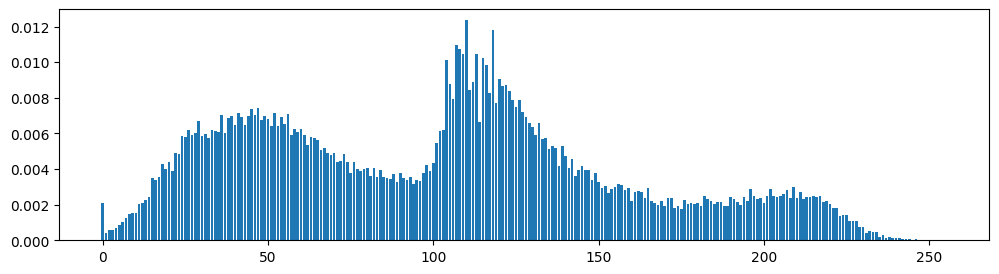

In [43]:
img_gray60 = cv2.imread('img_gray60.jpg')
hist_gray60 = compute_hist(img_gray60)
visualize_hist(hist_gray60)

Степень сжатия 30

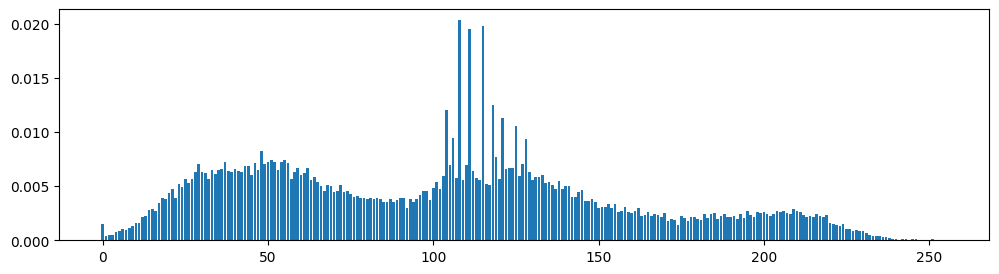

In [44]:
img_gray30 = cv2.imread('img_gray30.jpg')
hist_gray30 = compute_hist(img_gray30)
visualize_hist(hist_gray30)

Степень сжатия 5

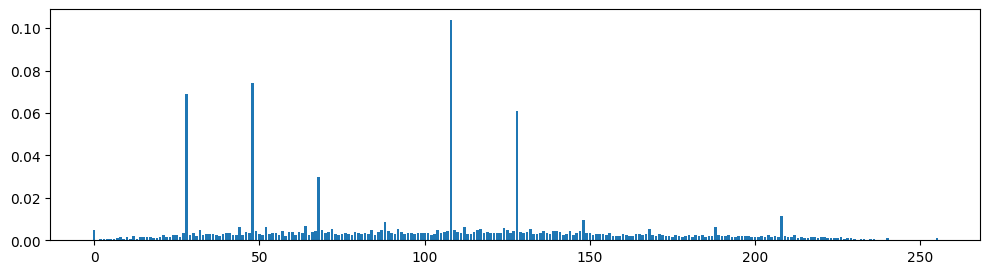

In [45]:
img_gray5 = cv2.imread('img_gray5.jpg')
hist_gray5 = compute_hist(img_gray5)
visualize_hist(hist_gray5)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

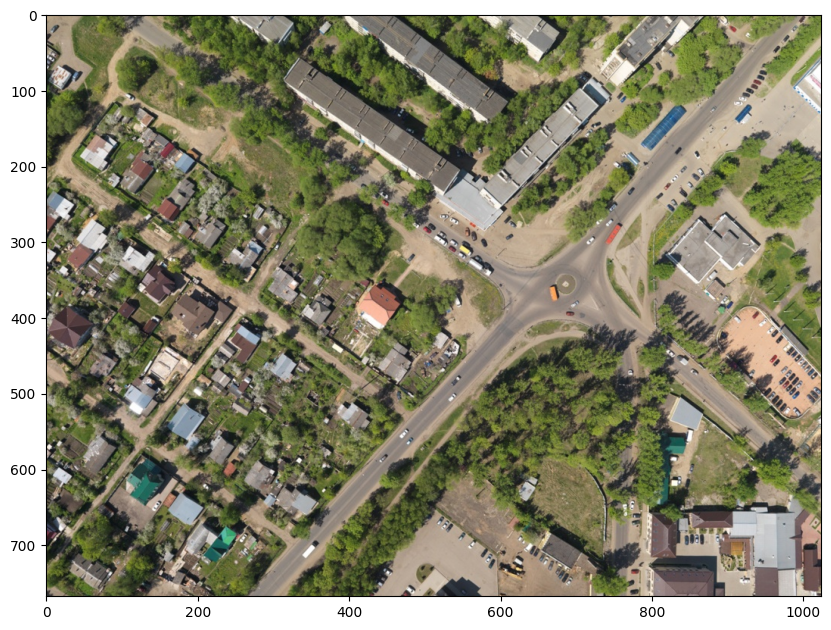

In [46]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

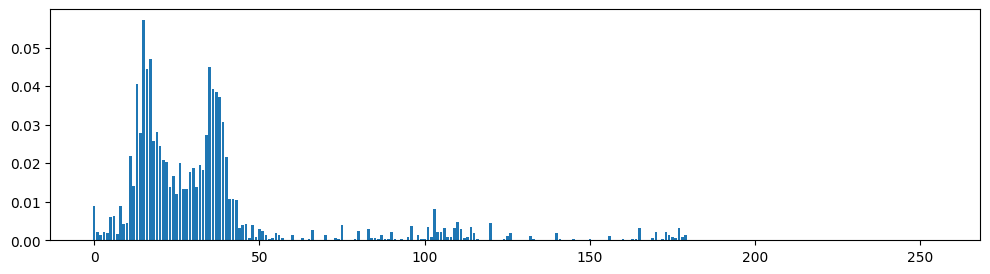

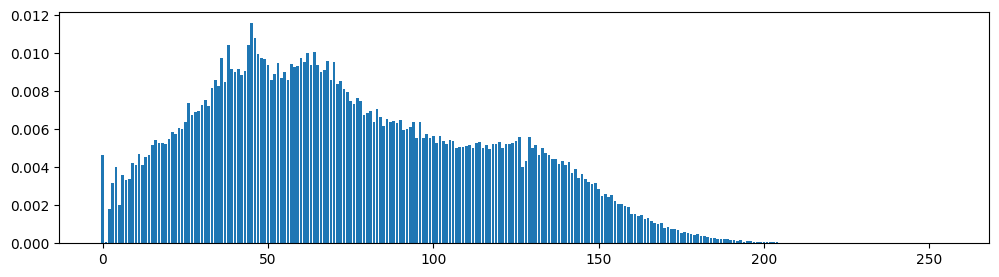

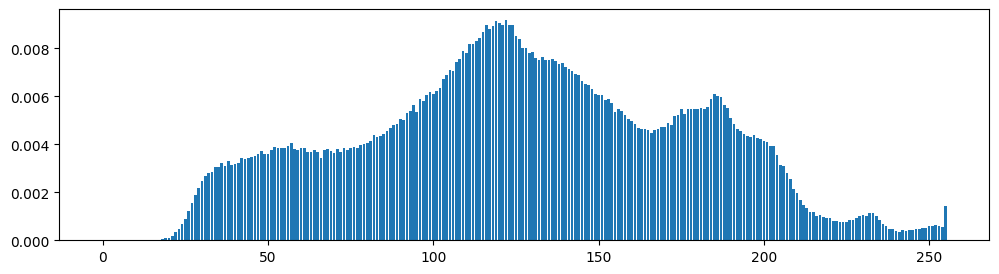

In [48]:
hsv_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)
visualize_hist(compute_hist(h))
visualize_hist(compute_hist(s))
visualize_hist(compute_hist(v))

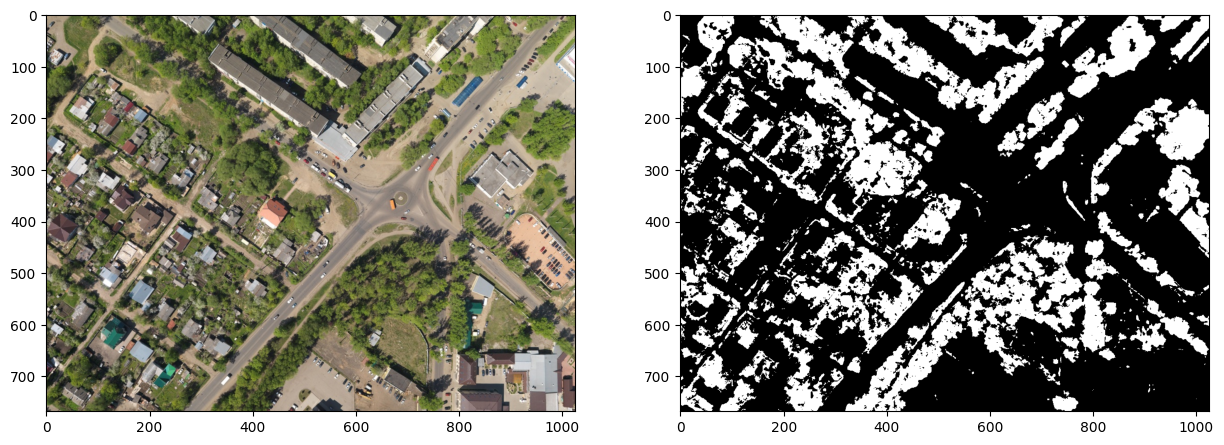

In [60]:
start = np.array([30,50,50])
end = np.array([90,255,255])
mask = cv2.inRange(hsv_image, start, end)
plt.figure(figsize=[15, 10])
plt.subplot(1,2,1)
plt.imshow(aerial_image)
plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [61]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img.astype('int64')
        transposed=False
        if img.shape[0]>img.shape[1]:
            self.img = self.img.T
            transposed=True
        
        print(type(self.img[0,0]))

        for i in range(self.img.shape[0]):
            for j in range(i, self.img.shape[0]):
                if i==0 and j==0:
                    self.img[j,i] = self.img[j,i]
                elif i==0:
                    self.img[j,i] = self.img[j,i] + self.img[j-1,i]
                elif j==0:
                    self.img[j,i] = self.img[j,i] + self.img[j,i-1]
                else:
                    self.img[j,i] = self.img[j,i] + self.img[j-1,i] + self.img[j,i-1] - self.img[j-1,i-1]
            for j in range(i+1, self.img.shape[1]):
                if i==0 and j==0:
                    self.img[i,j] = self.img[i,j]
                elif i==0:
                    self.img[i,j] = self.img[i,j] + self.img[i,j-1]
                elif j==0:
                    self.img[i,j] = self.img[i,j] + self.img[i-1,j]
                else:
                    self.img[i,j] = self.img[i,j] + self.img[i-1,j] + self.img[i,j-1] - self.img[i-1,j-1]
        
        if transposed:
            self.img = self.img.T

    def sum(self, x, y, w, h):
        if x>0 and y>0:
            return self.img[y+h-1, x+w-1]-self.img[y-1, x+w-1]-self.img[y+h-1, x-1]+self.img[y-1, x-1]
        elif x>0:
            return self.img[y+h-1, x+w-1]-self.img[y+h-1, x-1]
        elif y>0:
            return self.img[y+h-1, x+w-1]-self.img[y-1, x+w-1]
        else:
            return self.img[y+h-1, x+w-1]

In [62]:
I = IntegralImage(img_gray)

<class 'numpy.int64'>


In [63]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** Распознавание объектов и фильтрация.

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** Методу динамического программирования.